In [128]:
import pandas as pd
import ta
from ta.utils import dropna
import yfinance as yf
from matplotlib import pyplot as plt

# Load datas
df = yf.download("MSFT", '2015-01-01', '2022-05-24')
df.drop(columns=['Adj Close'], inplace=True)


# Clean NaN values
df = df.resample("D").last().copy()
df = dropna(df)
df

# Add ta features filling NaN values
stoch = ta.momentum.StochasticOscillator(
    high=df.High, low=df.Low, close=df.Close, window=14, smooth_window=3, fillna=True)
df['stoch'] = stoch.stoch()
df['stoch_signal'] = stoch.stoch_signal()
df['2021']
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):display(df)

[*********************100%***********************]  1 of 1 completed


/home/cabox/miniconda3/envs/junebug/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.


,Open,High,Low,Close,Volume,stoch,stoch_signal
Date,,,,,,,
2021-01-04,222.529999,223.000000,214.809998,217.690002,37130100.0,36.479261,59.900025
2021-01-05,217.259995,218.520004,215.699997,217.899994,23823000.0,37.884828,49.340701
2021-01-06,212.169998,216.490005,211.940002,212.250000,35930700.0,2.034106,25.466065
2021-01-07,214.039993,219.339996,213.710007,218.289993,27694500.0,41.666633,27.195189
2021-01-08,218.679993,220.580002,217.029999,219.619995,22956200.0,50.393685,31.364808
...,...,...,...,...,...,...,...
2021-12-27,335.459991,342.480011,335.429993,342.450012,19947000.0,94.951033,73.587048
2021-12-28,343.149994,343.809998,340.320007,341.250000,15661500.0,90.361454,83.674869
2021-12-29,341.299988,344.299988,339.679993,341.950012,15042000.0,91.312471,92.208319


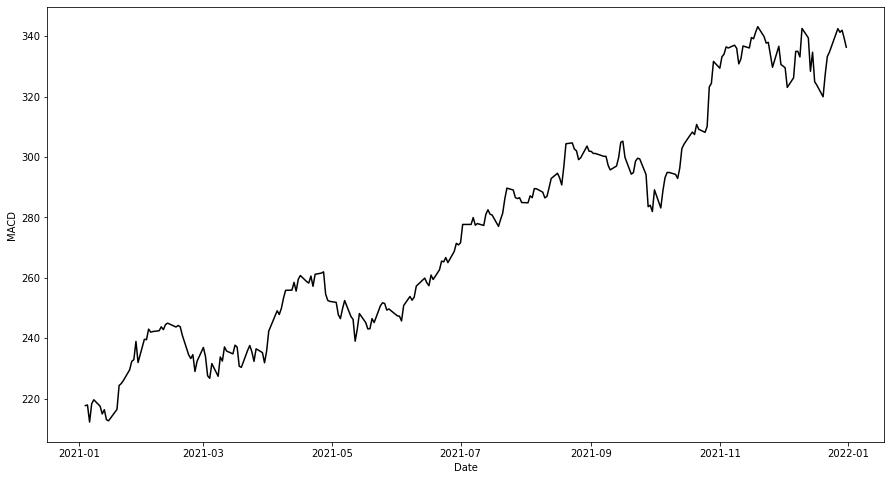

In [130]:
# Define Data

x = df.loc['2021'].index
data_1 = df.loc['2021'].Close
data_2 = df.loc['2021'].stoch
data_3 = df.loc['2021'].stoch_signal
  
# Create Plot

fig, ax1 = plt.subplots(figsize=(15,8)) 
  
ax1.set_xlabel('Date') 
ax1.set_ylabel('Close') 
ax1.plot(x, data_1, color = 'black') 
  
# Adding Twin Axes

#ax2 = ax1.twinx()
ax2.plot(x, data_2, color = 'blue')


ax2.plot(x, data_3, color = 'red')  

# Add label

plt.ylabel('MACD') 

# Show plot

plt.show()